Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [23]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

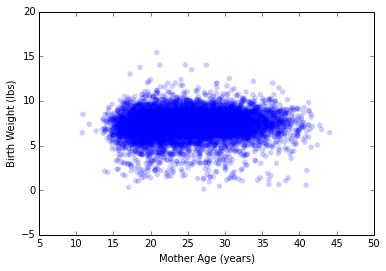

In [24]:
import nsfg
import thinkplot
import thinkstats2
import numpy as np

df = nsfg.ReadFemPreg()
df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
mother_age = df.agepreg
birth_weight = df.totalwgt_lb

#Scatter Plot with transparency
thinkplot.Scatter(mother_age, birth_weight, alpha=0.2)
thinkplot.Show(xlabel='Mother Age (years)',
               ylabel='Birth Weight (lbs)')

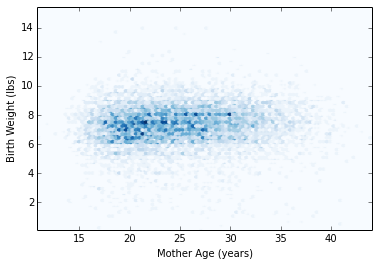

In [25]:
#Hexbin Plot
thinkplot.HexBin(mother_age, birth_weight)
thinkplot.Show(xlabel='Mother Age (years)',
               ylabel='Birth Weight (lbs)')

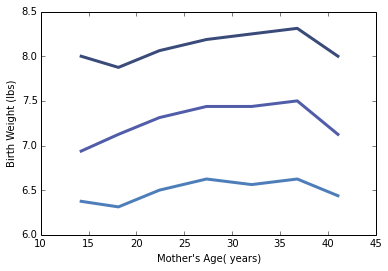

In [32]:
#Percentile of Birth Weight against Mother's age
bins = np.arange(5, 55, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(ages, weights, label=labels)

thinkplot.Show(xlabel="Mother's Age( years)",
               ylabel="Birth Weight (lbs)")

In [34]:
#Calculating Pearson's Correlation
import math

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

print Corr(mother_age, birth_weight)

0.0688339703541


In [36]:
#Calculation Spearman's rank correlation
import pandas

def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

print SpearmanCorr(mother_age, birth_weight)

0.0946100410966


There is a large difference between the two correlations, meaning that the relationship is non-linear and/or contain outliers. Usually, Spearman's correlation is more reliable.